In [1]:
import numpy as np
import pandas as pd 

# Untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_palette('Set1')
sns.set()

# Untuk pemodelan
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Untuk menghilangkan warnings saat plotting seaborn
import warnings
warnings.filterwarnings('ignore')

2022-06-09 10:46:36.255835: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-09 10:46:36.255874: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [8]:
# package = pd.read_csv('../../data/wisata/package_tourism.csv')
rating = pd.read_csv('../../data/rating.csv')
place = pd.read_csv('../../data/wisata.csv')
user = pd.read_csv('../../data/user.csv')

In [9]:
# Melihat gambaran data place

place.head()

,Place_Id,Place_Name,Description,Category,City,Rating,Coordinate,Lat,Long,Price,Image
0,1,The Keranjang Bali,Disini Anda akan dapat menemukan banyak spot y...,Rekreasi,Bali,4.0,"{'lat' : -8731451, 'lng': 115178175}",-873145,115178175,150000,https://arsitagx-master.s3.ap-southeast-1.amaz...
1,2,Bukit Campuhan,Perbukitan yang hijau dipenuhi dengan pepohona...,Cagar Alam,Bali,NaN,"{'lat' :-873145, 'lng: 11525503}",-849933,11525503,0,https://3.bp.blogspot.com/-BJETbctdU3k/VcF9eXe...
2,3,Pantai Pandawa,Pantai Pandawa yang berpasir putih ini cukup p...,Bahari,Bali,4.6,"{'lat' : -884527, 'lng': 11518707}",-884527,11518707,8000,https://arifsetiawan.com/wp-content/uploads/20...
3,4,Waterbom Bali,Wisata taman air di Pulau Bali ini sudah 3 tah...,Bahari,Bali,4.7,"{'lat' : -872857, 'lng' : 11516938}",-872857,11516938,220000,https://www.whitewaterwest.com/wp-content/uplo...
4,5,Garuda Wisnu Kencana,Garuda Wisnu Kencana atau GWK merupakan salah ...,Sejarah,Bali,4.5,"{'lat' : -881041, 'lng' : 11516760}",-881041,11516760,95000,https://img.jakpost.net/c/2018/11/28/2018_11_2...


In [10]:
# Merubah data agar hanya dari Kota Bandung

place = place[place['City']=='Bali']
place.head()


,Place_Id,Place_Name,Description,Category,City,Rating,Coordinate,Lat,Long,Price,Image
0,1,The Keranjang Bali,Disini Anda akan dapat menemukan banyak spot y...,Rekreasi,Bali,4.0,"{'lat' : -8731451, 'lng': 115178175}",-873145,115178175,150000,https://arsitagx-master.s3.ap-southeast-1.amaz...
1,2,Bukit Campuhan,Perbukitan yang hijau dipenuhi dengan pepohona...,Cagar Alam,Bali,NaN,"{'lat' :-873145, 'lng: 11525503}",-849933,11525503,0,https://3.bp.blogspot.com/-BJETbctdU3k/VcF9eXe...
2,3,Pantai Pandawa,Pantai Pandawa yang berpasir putih ini cukup p...,Bahari,Bali,4.6,"{'lat' : -884527, 'lng': 11518707}",-884527,11518707,8000,https://arifsetiawan.com/wp-content/uploads/20...
3,4,Waterbom Bali,Wisata taman air di Pulau Bali ini sudah 3 tah...,Bahari,Bali,4.7,"{'lat' : -872857, 'lng' : 11516938}",-872857,11516938,220000,https://www.whitewaterwest.com/wp-content/uplo...
4,5,Garuda Wisnu Kencana,Garuda Wisnu Kencana atau GWK merupakan salah ...,Sejarah,Bali,4.5,"{'lat' : -881041, 'lng' : 11516760}",-881041,11516760,95000,https://img.jakpost.net/c/2018/11/28/2018_11_2...


In [11]:
# melihat gambaran data rating

rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [12]:
# Merubah data rating agar hanya berisi rating pada tempat wisata dari Kota Yogyakarta

rating = pd.merge(rating, place[['Place_Id']], how='right', on='Place_Id')
rating.head()

,User_Id,Place_Id,Place_Ratings
0,36,1,4
1,38,1,2
2,64,1,2
3,74,1,2
4,86,1,4


In [13]:
# Melihat ukuran dataset rating untuk Kota Yogyakarta

rating.shape

(434, 3)

In [14]:
# Melihat gambaran data user

user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [15]:
# Merubah data user agar hanya berisi user yang pernah megunjungi wisata di Kota Yogyakarta

user = pd.merge(user, rating[['User_Id']], how='right', on='User_Id').drop_duplicates().sort_values('User_Id')
user.head()

,User_Id,Location,Age
83,1,"Semarang, Jawa Tengah",20
18,2,"Bekasi, Jawa Barat",21
345,3,"Cirebon, Jawa Barat",23
62,4,"Bekasi, Jawa Barat",21
63,5,"Lampung, Sumatera Selatan",20


In [16]:
# Melihat dataset user yang pernah memberi rating pada wisata di Kota Yogyakarta

user.shape

(232, 3)

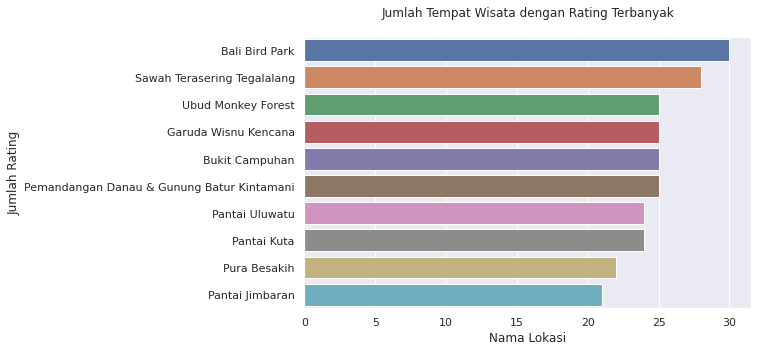

In [17]:
# Membuat dataframe berisi lokasi dengan jumlah rating terbanyak
top_10 = rating['Place_Id'].value_counts().reset_index()[0:10]
top_10 = pd.merge(top_10, place[['Place_Id','Place_Name']], how='left', left_on='index', right_on='Place_Id')

# Membuat visualisasi wisata dengan jumlah rating terbanyak
plt.figure(figsize=(8,5))
sns.barplot('Place_Id_x', 'Place_Name', data=top_10)
plt.title('Jumlah Tempat Wisata dengan Rating Terbanyak', pad=20)
plt.ylabel('Jumlah Rating')
plt.xlabel('Nama Lokasi')
plt.show()

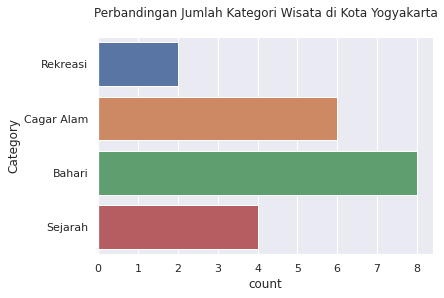

In [18]:
# Membuat visualisasi jumlah kategori wisata di Kota Yogyakarta

sns.countplot(y='Category', data=place)
plt.title('Perbandingan Jumlah Kategori Wisata di Kota Yogyakarta', pad=20)
plt.show()

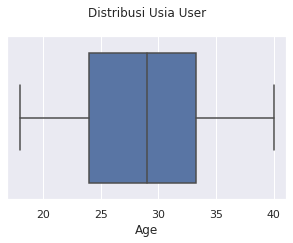

In [19]:
# Membuat visualisasi distribusi usia user

plt.figure(figsize=(5,3))
sns.boxplot(user['Age']);
plt.title('Distribusi Usia User', pad=20)
plt.show()

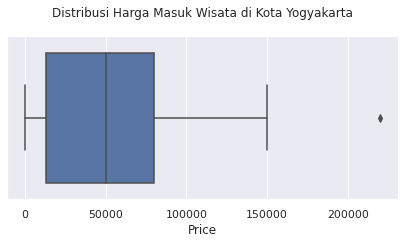

In [20]:
# Membuat visualisasi distribusi harga masuk tempat wisata

plt.figure(figsize=(7,3))
sns.boxplot(place['Price'])
plt.title('Distribusi Harga Masuk Wisata di Kota Yogyakarta', pad=20)
plt.show()

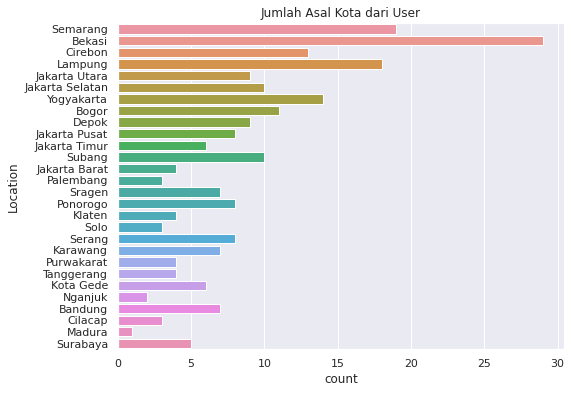

In [21]:
# Memfilter asal kota dari user
askot = user['Location'].apply(lambda x : x.split(',')[0])

# Visualisasi asal kota dari user
plt.figure(figsize=(8,6))
sns.countplot(y=askot)
plt.title('Jumlah Asal Kota dari User')
plt.show()

 # MODELING

In [22]:
# Membaca dataset untuk dilakukan encoding
 
df = rating.copy()
df.head()

,User_Id,Place_Id,Place_Ratings
0,36,1,4
1,38,1,2
2,64,1,2
3,74,1,2
4,86,1,4


In [23]:
#ENCODING
def dict_encoder(col, data=df):

  # Mengubah kolom suatu dataframe menjadi list tanpa nilai yang sama
  unique_val = data[col].unique().tolist()

  # Melakukan encoding value kolom suatu dataframe ke angka
  val_to_val_encoded = {x: i for i, x in enumerate(unique_val)}

  # Melakukan proses encoding angka ke value dari kolom suatu dataframe
  val_encoded_to_val = {i: x for i, x in enumerate(unique_val)}
  return val_to_val_encoded, val_encoded_to_val

In [24]:
# ENCODING + MAPING 

# Encoding User_Id
user_to_user_encoded, user_encoded_to_user = dict_encoder('User_Id')

# Mapping User_Id ke dataframe
df['user'] = df['User_Id'].map(user_to_user_encoded)

In [25]:
# Encoding Place_Id
place_to_place_encoded, place_encoded_to_place = dict_encoder('Place_Id')

# Mapping Place_Id ke dataframe place
df['place'] = df['Place_Id'].map(place_to_place_encoded)

In [26]:
# Mendapatkan jumlah user dan place
num_users, num_place = len(user_to_user_encoded), len(place_to_place_encoded)
 
# Mengubah rating menjadi nilai float
df['Place_Ratings'] = df['Place_Ratings'].values.astype(np.float32)
 
# Mendapatkan nilai minimum dan maksimum rating
min_rating, max_rating = min(df['Place_Ratings']), max(df['Place_Ratings'])
 
print(f'Number of User: {num_users}, Number of Place: {num_place}, Min Rating: {min_rating}, Max Rating: {max_rating}')

Number of User: 232, Number of Place: 20, Min Rating: 1.0, Max Rating: 5.0


In [27]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df.head(2)

,User_Id,Place_Id,Place_Ratings,user,place
280,299,13,1.0,136,12
78,220,4,4.0,46,3


In [28]:
# Membuat variabel x untuk mencocokkan data user dan place menjadi satu value
x = df[['user', 'place']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = df['Place_Ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

In [29]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_places, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_places = num_places
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.places_embedding = layers.Embedding( # layer embeddings places
        num_places,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.places_bias = layers.Embedding(num_places, 1) # layer embedding places bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    places_vector = self.places_embedding(inputs[:, 1]) # memanggil layer embedding 3
    places_bias = self.places_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_places = tf.tensordot(user_vector, places_vector, 2) 
 
    x = dot_user_places + user_bias + places_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

In [30]:
model = RecommenderNet(num_users, num_place, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.0004),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

2022-06-09 10:48:04.838321: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-09 10:48:04.838363: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-09 10:48:04.838406: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (wan): /proc/driver/nvidia/version does not exist


In [31]:
 class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_root_mean_squared_error')<0.25):
      print('Lapor! Metriks validasi sudah sesuai harapan')
      self.model.stop_training = True

In [32]:
# Memulai training
 
history = model.fit(
    x = x_train,
    y = y_train,
    epochs = 100,
    validation_data = (x_val, y_val),
    callbacks = [myCallback()]
)

Epoch 1/100
11/11 [==============================] - 1s 31ms/step - loss: 0.7910 - root_mean_squared_error: 0.4149 - val_loss: 0.8583 - val_root_mean_squared_error: 0.4498
Epoch 2/100
11/11 [==============================] - 0s 7ms/step - loss: 0.7645 - root_mean_squared_error: 0.4069 - val_loss: 0.8533 - val_root_mean_squared_error: 0.4478
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 0.7681 - root_mean_squared_error: 0.4077 - val_loss: 0.8499 - val_root_mean_squared_error: 0.4464
Epoch 4/100
11/11 [==============================] - 0s 7ms/step - loss: 0.7234 - root_mean_squared_error: 0.3843 - val_loss: 0.8478 - val_root_mean_squared_error: 0.4455
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 0.7930 - root_mean_squared_error: 0.4160 - val_loss: 0.8476 - val_root_mean_squared_error: 0.4453
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 0.7784 - root_mean_squared_error: 0.4134 - val_loss: 0.8487 - val_root_

Epoch 49/100
11/11 [==============================] - 0s 8ms/step - loss: 0.7149 - root_mean_squared_error: 0.3774 - val_loss: 0.8024 - val_root_mean_squared_error: 0.4275
Epoch 50/100
11/11 [==============================] - 0s 7ms/step - loss: 0.6882 - root_mean_squared_error: 0.3608 - val_loss: 0.8028 - val_root_mean_squared_error: 0.4276
Epoch 51/100
11/11 [==============================] - 0s 7ms/step - loss: 0.7119 - root_mean_squared_error: 0.3739 - val_loss: 0.8034 - val_root_mean_squared_error: 0.4280
Epoch 52/100
11/11 [==============================] - 0s 8ms/step - loss: 0.6897 - root_mean_squared_error: 0.3618 - val_loss: 0.8053 - val_root_mean_squared_error: 0.4288
Epoch 53/100
11/11 [==============================] - 0s 7ms/step - loss: 0.6875 - root_mean_squared_error: 0.3607 - val_loss: 0.8076 - val_root_mean_squared_error: 0.4298
Epoch 54/100
11/11 [==============================] - 0s 6ms/step - loss: 0.7093 - root_mean_squared_error: 0.3755 - val_loss: 0.8083 - val_

11/11 [==============================] - 0s 6ms/step - loss: 0.6703 - root_mean_squared_error: 0.3495 - val_loss: 0.7988 - val_root_mean_squared_error: 0.4244
Epoch 97/100
11/11 [==============================] - 0s 6ms/step - loss: 0.6593 - root_mean_squared_error: 0.3411 - val_loss: 0.7996 - val_root_mean_squared_error: 0.4249
Epoch 98/100
11/11 [==============================] - 0s 6ms/step - loss: 0.6571 - root_mean_squared_error: 0.3397 - val_loss: 0.7996 - val_root_mean_squared_error: 0.4249
Epoch 99/100
11/11 [==============================] - 0s 6ms/step - loss: 0.6568 - root_mean_squared_error: 0.3400 - val_loss: 0.8003 - val_root_mean_squared_error: 0.4253
Epoch 100/100
11/11 [==============================] - 0s 6ms/step - loss: 0.6716 - root_mean_squared_error: 0.3499 - val_loss: 0.8000 - val_root_mean_squared_error: 0.4251


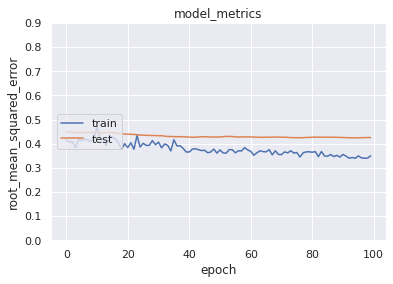

In [35]:
# Menampilkan plot loss dan validation

plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.ylim(ymin=0, ymax=0.9)
plt.legend(['train', 'test'], loc='center left')
plt.show()

# MEMBUAT TOP 5 REKOMENDASI

In [36]:
# Menyiapkan dataframe
place_df = place[['Place_Id','Place_Name','Category','Rating','Price','Image']]
place_df.columns = ['id','place_name','category','rating','price','image']
df = rating.copy()

In [37]:
# Mengambil sample user
user_id = df.User_Id.sample(1).iloc[0]
place_visited_by_user = df[df.User_Id == user_id]

In [38]:
# Membuat data lokasi yang belum dikunjungi user
place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user.Place_Id.values)]['id'] 
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)
 
place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

In [39]:
# Mengambil top 5 recommendation
ratings = model.predict(user_place_array).flatten()
top_ratings_indices = ratings.argsort()[-5:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]
 

print('')
print('----' * 15)
print('Top 5 place recommendation')
print('----' * 15)
 
recommended_place = place_df[place_df['id'].isin(recommended_place_ids)]
for row, i in zip(recommended_place.itertuples(), range(1,8)):
    print(i,'.', row.place_name, '\n    ', row.category, ',', 'Harga Tiket Masuk ', row.price, ',', 'Rating Wisata ',row.rating, ',', row.image,'\n')

print('==='*15)

1/1 [==============================] - 0s 144ms/step

------------------------------------------------------------
Top 5 place recommendation
------------------------------------------------------------
1 . The Keranjang Bali 
     Rekreasi , Harga Tiket Masuk  150000 , Rating Wisata  4.0 , https://arsitagx-master.s3.ap-southeast-1.amazonaws.com/img-medium/22921/12577/cata-interiors-the-keranjang-bali1571046637-m.jpeg 

2 . Garuda Wisnu Kencana 
     Sejarah , Harga Tiket Masuk  95000 , Rating Wisata  4.5 , https://img.jakpost.net/c/2018/11/28/2018_11_28_59559_1543399591._large.jpg 

3 . Pantai Tanjung Benoa 
     Bahari , Harga Tiket Masuk  50000 , Rating Wisata  4.5 , https://www.referensiwisata.com/wp-content/uploads/2019/05/keindahan-pantai-tanjung-benoa-bali.png 

4 . Sawah Terasering Tegalalang 
     Cagar Alam , Harga Tiket Masuk  0 , Rating Wisata  4.5 , https://www.baligetaway.co.id/wp-content/uploads/2014/10/wisata-tegalalang-sawah-terasering.jpg 

5 . Air Terjun Sekumpul 
  

In [40]:
# recommended = recommended_place.to_csv('rekomendasi.csv', index=False)

In [41]:
# pd.read_csv('rekomendasi.csv')

In [42]:
import pickle
filename = '../../model/wiata_bali.pkl'
pickle.dump(model, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://4b3ede25-0171-42ed-9c01-ed0e227f201c/assets


In [43]:
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model